In [1]:
# Import packages
import plotnine as p9
import numpy as np
import statistics
from scipy import stats
from scipy.stats import chi2_contingency
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels as sm
import seaborn as sns
from sklearn import linear_model 
#%matlpotlib inline

In [2]:
#import the file
df = pd.read_csv('churn_clean.csv',dtype={'locationid':np.int64})

In [4]:
#print first 100 records
df.head(100)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,W877056,728fccac-151c-4743-8c4a-ebf5af17ec9d,2d0a8b770314914a21b0714fefb68925,Dallas,TX,Dallas,75212,32.78137,-96.87917,...,245.145743,1158.913690,5,5,4,5,1,5,5,4
96,97,M478246,fb749668-dbf8-448a-bc59-5bdba08f7e0b,e04663ac6cc68fac084cd2b394ca7cb8,Claytonville,IL,Iroquois,60926,40.57234,-87.80962,...,124.978080,529.407330,4,4,4,3,2,4,3,4
97,98,N417817,832e769e-3b90-47cc-8f70-12e77fbd52a2,4886325be93630732220fb84b427c7cd,Beaverville,IL,Iroquois,60912,40.97003,-87.59935,...,187.484705,1956.733700,3,2,2,4,3,2,3,2
98,99,R180138,7def992e-acd6-4b3e-9d01-68812f5fd2ff,9f2b4718c758e51e0b16b99cc7915687,Fayetteville,NC,Cumberland,28301,35.07431,-78.88358,...,162.500692,2056.386979,5,4,4,3,4,4,5,5


In [5]:
#check for columns with missing values
missingvalues = df.isna().sum()

In [6]:
#print the summary of columns with missing values
print(missingvalues)

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [7]:
#drop columns irrelevant to analysis
NewDf = df.drop(columns=['Job','CaseOrder', 'Customer_id', 'Interaction','UID','City','State','County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone','Techie', 'Port_modem','Tablet', 
'Phone','Multiple','OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','Contract','InternetService','StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 
 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])

In [10]:
#utilize a sample size of 1000 in new dataset
NewDf = NewDf.head(1000)

In [11]:
#check the datatypes of each columns
NewDf.dtypes

Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Tenure                  float64
MonthlyCharge           float64
Bandwidth_GB_Year       float64
dtype: object

In [12]:
#create dummies for certain variables 
pd.get_dummies(NewDf, columns = ['Gender', 'Marital', 'Churn'], drop_first=True)



,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Gender_Male,Gender_Nonbinary,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Churn_Yes
0,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110,1,0,0,0,0,1,0
1,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766,0,0,1,0,0,0,1
2,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961,0,0,0,0,0,1,0
3,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412,1,0,1,0,0,0,0
4,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,38,47719.56,9.757159,19,3,0,15.278294,230.105118,1838.063609,0,0,0,0,1,0,1
996,3,19,41311.01,6.680450,7,1,0,4.060474,210.156274,1173.765640,1,0,0,0,0,1,1
997,4,81,29527.20,11.134632,13,0,0,9.618627,152.509013,1280.379950,1,0,0,0,0,0,0
998,7,65,59990.91,9.604666,14,0,0,4.952764,149.948316,767.850700,0,0,0,0,0,0,0


In [14]:
#summary statistics
NewDf.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.05200,52.745000,40265.355710,10.051783,12.135000,1.015000,0.404000,8.837580,173.466572,1281.340469
std,2.17946,20.822092,28509.875002,2.998310,2.969106,1.000888,0.622231,5.865448,43.471429,560.675747
min,0.00000,18.000000,368.500000,0.760277,2.000000,0.000000,0.000000,1.033068,79.978861,169.399280
25%,0.00000,34.000000,19249.005000,8.024956,10.000000,0.000000,0.000000,4.155480,139.980992,853.323745
50%,1.00000,52.000000,33574.290000,10.064785,12.000000,1.000000,0.000000,7.644511,169.944668,1219.835656
75%,3.00000,71.000000,54355.650000,12.071291,14.000000,2.000000,1.000000,12.309010,202.682861,1642.052542
max,10.00000,89.000000,186035.040000,19.081685,21.000000,6.000000,3.000000,32.307721,287.642733,3309.919373


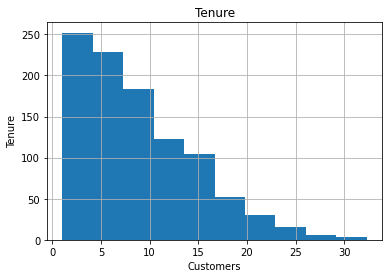

In [15]:
#create univariate visualizations
NewDf.hist(column='Tenure')
plt.xlabel("Customers")
plt.ylabel("Tenure")
plt.show()

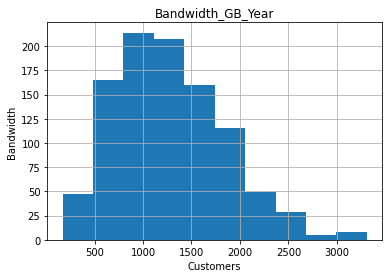

In [16]:
NewDf.hist(column='Bandwidth_GB_Year')
plt.xlabel("Customers")
plt.ylabel("Bandwidth")
plt.show()

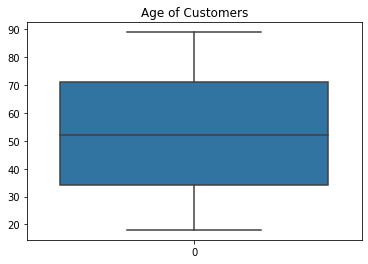

In [17]:
sns.boxplot(data=NewDf.Age)
plt.title('Age of Customers')
plt.show()

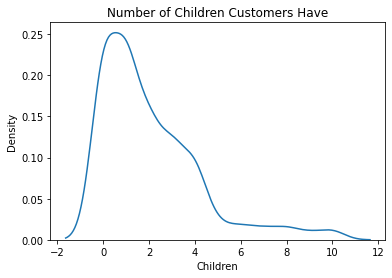

In [18]:
sns.kdeplot(NewDf['Children'])
plt.title("Number of Children Customers Have")
plt.show()

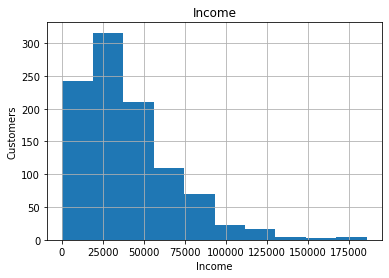

In [19]:
NewDf.hist(column='Income')
plt.xlabel("Income")
plt.ylabel("Customers")
plt.show()

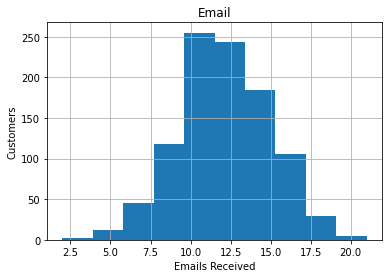

In [20]:
NewDf.hist(column='Email')
plt.xlabel("Emails Received")
plt.ylabel("Customers")
plt.show()

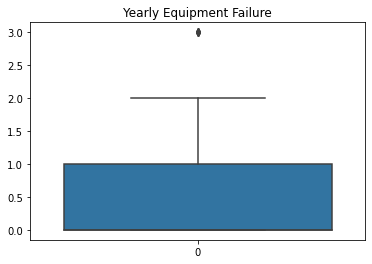

In [21]:
sns.boxplot(data=NewDf.Yearly_equip_failure)
plt.title('Yearly Equipment Failure')
plt.show()


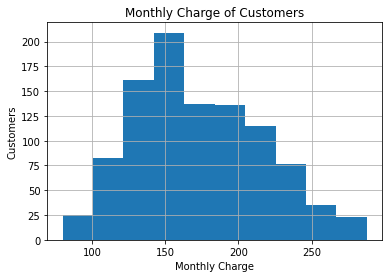

In [22]:
NewDf.hist(column='MonthlyCharge')
plt.title('Monthly Charge of Customers')
plt.xlabel("Monthly Charge")
plt.ylabel("Customers")
plt.show()

<AxesSubplot:xlabel='Outage_sec_perweek', ylabel='Tenure'>

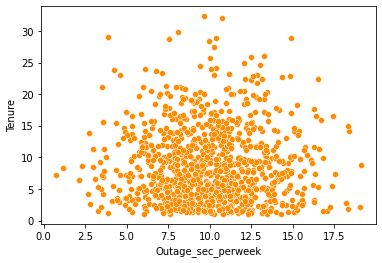

In [39]:
#bivariate visualization of predictor variable, Bandwidth_GB_Year and target variable: Tenure 
sns.scatterplot(x='Outage_sec_perweek', y='Tenure', data=NewDf, color='darkorange')



<AxesSubplot:xlabel='Contacts', ylabel='Tenure'>

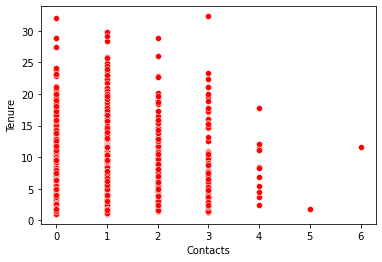

In [80]:
#bivariate visualization of Tenure vs Gender 
sns.scatterplot(x='Contacts', y='Tenure', data=NewDf, color='red')


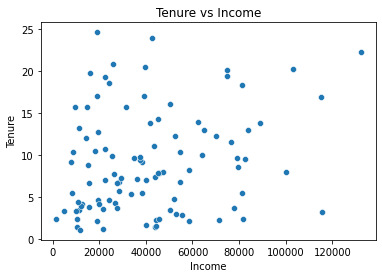

In [37]:

plt.title('Tenure vs Income')
sns.scatterplot(data = NewDf, x = NewDf.Income[0:100], y = NewDf.Tenure[0:100], color=green)
plt.show()

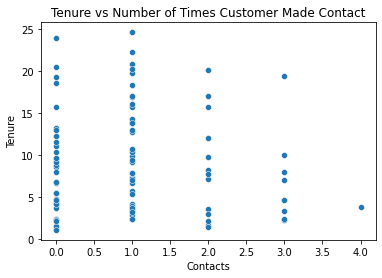

In [32]:

plt.title('Tenure vs Number of Times Customer Made Contact')
sns.scatterplot(data = NewDf, x = NewDf.Contacts[0:100], y = NewDf.Tenure[0:100])
plt.show()

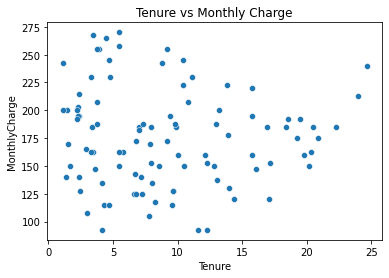

In [28]:

plt.title('Tenure vs Monthly Charge')
sns.scatterplot(data = NewDf, x = NewDf.Tenure[0:100], y = NewDf.MonthlyCharge[0:100] color=purple)
plt.show()

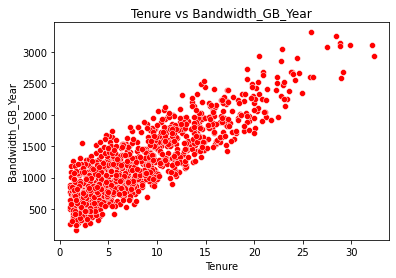

In [29]:
plt.title('Tenure vs Bandwidth_GB_Year')
sns.scatterplot(data=NewDf, x = 'Tenure', y = 'Bandwidth_GB_Year',color='red')
plt.show()

In [41]:
NewDf.to_csv ('NewDf.csv', index = False, header=True)
print(NewDf)

     Children  Age    Income    Marital  Gender Churn  Outage_sec_perweek  \
0           0   68  28561.99    Widowed    Male    No            7.978323   
1           1   27  21704.77    Married  Female   Yes           11.699080   
2           4   50   9609.57    Widowed  Female    No           10.752800   
3           1   48  18925.23    Married    Male    No           14.913540   
4           0   83  40074.19  Separated    Male   Yes            8.147417   
..        ...  ...       ...        ...     ...   ...                 ...   
995         0   38  47719.56  Separated  Female   Yes            9.757159   
996         3   19  41311.01    Widowed    Male   Yes            6.680450   
997         4   81  29527.20   Divorced    Male    No           11.134632   
998         7   65  59990.91   Divorced  Female    No            9.604666   
999         0   48  48587.84    Married    Male   Yes            9.312626   

     Email  Contacts  Yearly_equip_failure     Tenure  MonthlyCharge  \
0  

In [62]:
#initial multiple regression model
mod1f =  smf.ols(' Tenure ~ Age + Children + Income + Marital + Gender + Churn + Outage_sec_perweek + Email + Contacts + MonthlyCharge + Bandwidth_GB_Year', data=NewDf)
mod1f_res = mod1f.fit()
mod1f_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     341.5
Date:                Tue, 31 May 2022   Prob (F-statistic):               0.00
Time:                        22:07:40   Log-Likelihood:                -2274.8
No. Observations:                1000   AIC:                             4582.
Df Residuals:                     984   BIC:                             4660.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0434      0.588      0.074      0.941      -1.109       1.196
Marital[T.Married]           0.1235      0.242      0.510      0.610      -0.352       0.599
Marital[T.Never Married]     0.0693      0.231      0.300      0.764      -0.384       0.523
Marital[T.Separated]        -0.1745      0.235     -0.742      0.458      -0.636       0.287
Marital[T.Widowed]           0.1041      0.231      0.450      0.653      -0.350       0.558
Gender[T.Male]              -0.6795      0.153     -4.449      0.000      -0.979      -0.380
Gender[T.Nonbinary]         -0.1910      0.499     -0.383      0.702      -1.170       0.788
Churn[T.Yes]                -1.5532      0.176     -8.803      0.000      -1.899      -1.207
Age                          0.0347      0.004      9.396      0.000       0.027       0.042
Children                    -0.2933      0.035     -8.391      0.000      -0.362      -0.225
Income                   -2.916e-06   2.65e-06     -1.100      0.271   -8.12e-06    2.28e-06
Outage_sec_perweek          -0.0348      0.025     -1.376      0.169      -0.085       0.015
Email                        0.0101      0.026      0.397      0.692      -0.040       0.060
Contacts                     0.0070      0.075      0.093      0.926      -0.141       0.155
MonthlyCharge               -0.0228      0.002    -10.853      0.000      -0.027      -0.019
Bandwidth_GB_Year            0.0101      0.000     70.007      0.000       0.010       0.010
==============================================================================
Omnibus:                       68.756   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.536
Skew:                          -0.361   Prob(JB):                     9.56e-10
Kurtosis:                       2.311   Cond. No.                     3.92e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
#reduced multiple regression model
ReducedMod =  smf.ols('Tenure ~ MonthlyCharge + Churn', data=NewDf)
ReducedMod_res = ReducedMod.fit()
ReducedMod_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     13.54
Date:                Tue, 31 May 2022   Prob (F-statistic):           1.57e-06
Time:                        22:12:41   Log-Likelihood:                -3174.1
No. Observations:                1000   AIC:                             6354.
Df Residuals:                     997   BIC:                             6369.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.8729      0.788      8.724      0.000       5.327       8.419
Churn[T.Yes]     -2.1700      0.427     -5.087      0.000      -3.007      -1.333
MonthlyCharge     0.0174      0.005      3.545      0.000       0.008       0.027
==============================================================================
Omnibus:                      121.012   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.958
Skew:                           0.934   Prob(JB):                     1.51e-36
Kurtosis:                       3.684   Cond. No.                         782.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

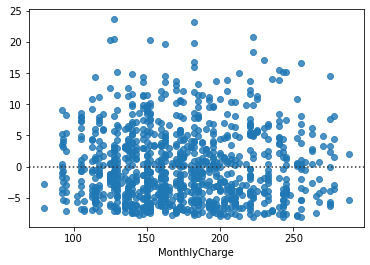

In [57]:
# import packages and libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
  
#create residual plot

residuals= NewDf['Tenure'] - ReducedMod_res.predict(NewDf[['Age','MonthlyCharge']])
sns.residplot(x=NewDf['MonthlyCharge'], y=residuals)
plt.show()




In [79]:
print(np.sqrt(ReducedMod_res.mse_resid))

5.793159250362822
